**Data Loading**

In [54]:
import pandas as pd

In [55]:
netflix_data = pd.read_csv('netflix_titles.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Basic Statistics**

In [56]:
descriptive_stats = netflix_data.describe(include='all')
data_info = netflix_data.info()
descriptive_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


**Visualization**

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Ratings')

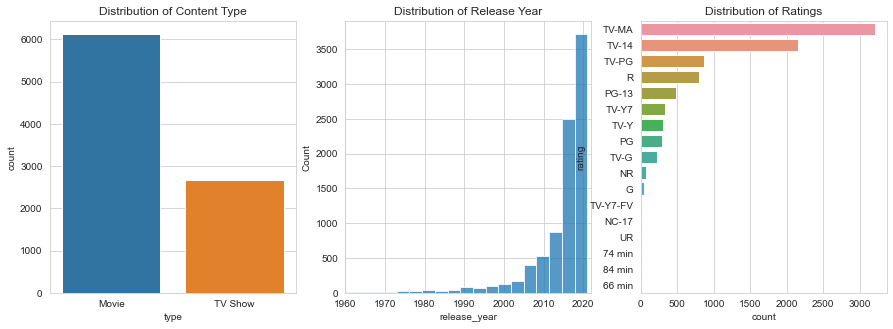

In [58]:
sns.set_style("whitegrid")

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.countplot(data=netflix_data, x='type')
plt.title('Distribution of Content Type')

plt.subplot(1, 3, 2)
sns.histplot(netflix_data['release_year'], bins=30)
plt.title('Distribution of Release Year')
plt.xlim(1960, 2022)

plt.subplot(1, 3, 3)
sns.countplot(data=netflix_data, y='rating', order=netflix_data['rating'].value_counts().index)
plt.title('Distribution of Ratings')

From the diagrams, we can observe:

1. Distribution of Content Type:
    Netflix has significantly more movies than TV shows.

2. Distribution of Release Year:
    In recent years, especially after 2010, Netflix has seen a significant increase in content.
    Before 2000, content is relatively less.

3. Distribution of Ratings:
    The most common rating is TV-MA, followed by TV-14 and TV-PG.
    Some ratings such as 'UR' and 'NC-17' are rare in the data.

**Data Tranformation**

In [59]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

netflix_data.loc[netflix_data['type'] == 'Movie', 'duration'] = netflix_data[netflix_data['type'] == 'Movie']['duration'].dropna().str.split(' ').str[0].astype(int)

netflix_data.loc[netflix_data['type'] == 'TV Show', 'duration'] = netflix_data[netflix_data['type'] == 'TV Show']['duration'].dropna().str.split(' ').str[0].astype(int)

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Data cleaning**

In [60]:
missing = netflix_data.isnull().sum()
missing

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [61]:
# Using 'Unkown' to fill the columns of director, cast, country and data_added.
columns_to_fill_unknown = ['director', 'cast', 'country', 'date_added']
netflix_data[columns_to_fill_unknown] = netflix_data[columns_to_fill_unknown].fillna('Unknown')

# Using most common rating to fill the colume of rating.
mode_rating = netflix_data['rating'].mode()[0]
netflix_data['rating'].fillna(mode_rating, inplace=True)

# Using the medians of movies and tv shows to fillthe column of duration.
median_duartion_movie = netflix_data[netflix_data['type'] == 'Movie']['duration'].median()
median_duartion_tvshow = netflix_data[netflix_data['type'] == 'TV Show']['duration'].median()
netflix_data.loc[netflix_data['type'] == 'Movie', 'duration'] = netflix_data[netflix_data['type'] == 'Movie']['duration'].fillna(median_duartion_movie)
netflix_data.loc[netflix_data['type'] == 'TV Show', 'duration'] = netflix_data[netflix_data['type'] == 'TV Show']['duration'].fillna(median_duartion_tvshow)

missing_after = netflix_data.isnull().sum()

missing_after

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Distribution of Content in Different Countries**

In [62]:
country_count = netflix_data['country'].value_counts().head(10)
country_count

United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

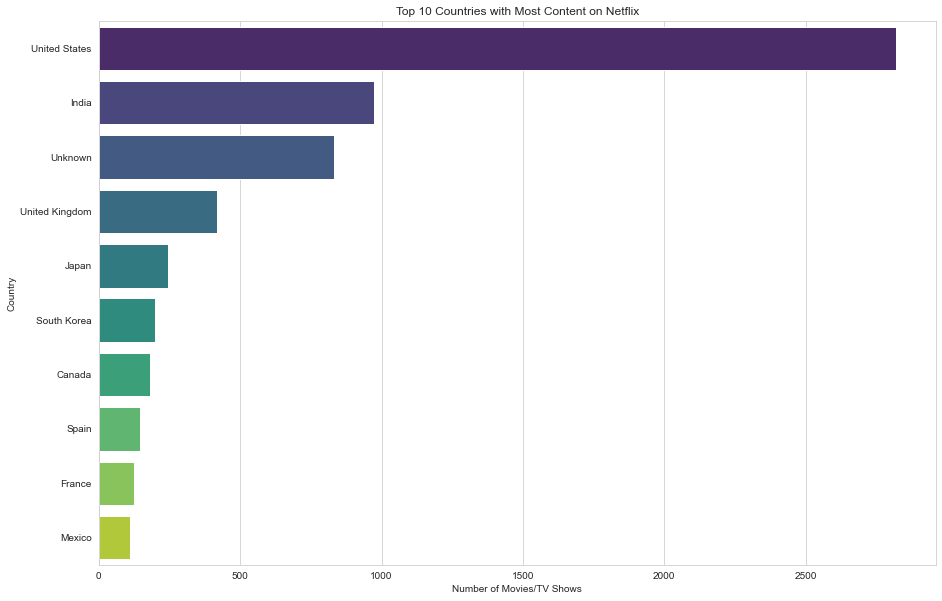

In [63]:
plt.figure(figsize=(15,10))
sns.barplot(y=country_count.index, x=country_count.values, palette="viridis")
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Country')
plt.show()

From the figure above, we can observe:

THe United States has the most content of Netfilx, far more than other countries.
India and the UK are in second and third place respectively, but both have far less content than the US.
Other countries such as Canada, France and Japan also have a considerable amount of content.

**Word Cloud Visualization**

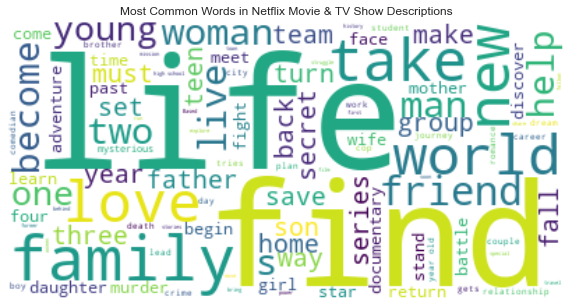

In [64]:
from wordcloud import WordCloud, STOPWORDS

all_description = " ".join(description for description in netflix_data['description'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white", stopwords=stopwords, max_words=100, contour_width=3).generate(all_description)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Netflix Movie & TV Show Descriptions")
plt.show()

**Recommendation System for Movies and TV Shows Using TF-IDF**

In [65]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_data['description'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

indices = pd.Series(netflix_data.index, index=netflix_data['title']).drop_duplicates()

In [66]:
def get_recommendation(title, cosine_sim=cosine_sim):

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores_sorted = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores_sorted = sim_scores_sorted[1 : 11]
    movie_indices = [i[0] for i in sim_scores_sorted]

    return netflix_data['title'].iloc[movie_indices]

In [67]:
recommendations = get_recommendation('Blood & Water')
recommendations

5344    Message from the King
1884      Walk Away from Love
4285                    Lilli
4271               Lion Pride
4209               Next Enti?
613                 Voiceless
108                 Dive Club
1905             Cold Harbour
6289                  Bewafaa
5485                Ram Jaane
Name: title, dtype: object

**Recommendation System for Movies and TV Shows Using Word2Vec**

In [68]:
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader

model = gensim.downloader.load('word2vec-google-news-300')

In [69]:
import numpy as np

def get_vector(text):
    words = [word for word in text.lower().split() if word in model.key_to_index]
    if len(words) >= 1:
        return np.mean(model[words], axis=0)
    else:
        return np.zeros(300)

netflix_data['vector'] = netflix_data['description'].apply(get_vector)

In [70]:
def get_recommendations_using_embeddings(title):

    idx = netflix_data[netflix_data['title'] == title].index[0]
    vectors = np.array([x for x in netflix_data['vector']])
    sim_scores = list(enumerate(cosine_similarity([vectors[idx]], vectors)[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    
    return netflix_data['title'].iloc[movie_indices]

In [71]:
recommendations = get_recommendations_using_embeddings('Blood & Water')
recommendations

1825                         The Kite
2045    I'm Thinking of Ending Things
613                         Voiceless
2734               Kuch Kuch Hota Hai
4726                          Highway
5025                         Veronica
2678            Jem and the Holograms
6156              An Innocent Mistake
5184                    Akulah Balqis
1827                  Under the Bombs
Name: title, dtype: object